In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


# Functions 

In [2]:
def perform_eda(data):
    # Summary statistics
    summary = data.describe()
    
    # Missing values
    missing_values = data.isnull().sum()
    
    # Data types
    data_types = data.dtypes
    
    # Unique values
    unique_values = data.nunique()
    
    
    # Print results
    print("Summary Statistics:\n", summary)
    print("\nMissing Values:\n", missing_values)
    print("\nData Types:\n", data_types)
    print("\nUnique Values:\n", unique_values)
    print("\nShape of data:\n", data.shape)
    
def remove_non_letters(text):
    return re.sub('[^a-zA-Z]', '', text)




# Primary Data Analysis

In [3]:
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('BX-Users.csv', sep=';',skiprows=1, names=u_cols, encoding='latin-1',low_memory=False)
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
b_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
books = pd.read_csv('BX-Books.csv', sep=';',skiprows=1, names=b_cols, encoding='latin-1',low_memory=False,on_bad_lines='warn')
books.head()
# 19 books not in data frame

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\nSkipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\nSkipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\nSkipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('BX-Book-Ratings.csv',skiprows=1, sep=';', names=r_cols, encoding='latin-1',low_memory=False)
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print('-'*10)
print( 'Stats for users df \n')
print('-'*10)

perform_eda(users)
print('-'*10)
print( 'Stats for books df')
print('-'*10)


perform_eda(books)
print('-'*10)
print( 'Stats for ratings df')
print('-'*10)

perform_eda(ratings)
print('-'*10)


----------
Stats for users df 

----------
Summary Statistics:
             user_id            age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000

Missing Values:
 user_id          0
location         0
age         110762
dtype: int64

Data Types:
 user_id       int64
location     object
age         float64
dtype: object

Unique Values:
 user_id     278858
location     57339
age            165
dtype: int64

Shape of data:
 (278858, 3)
----------
Stats for books df
----------
Summary Statistics:
               isbn      book_title      book_author year_of_publication  \
count       271360          271360           271359              271360   
unique      271360          242135           102023                 118   
top     0195153448  Selected Poems  Agatha

# Data Cleanup

In [7]:
users['age'] = users['age'].astype(float)
users['user_id'] = users['user_id'].astype(int)
users['location'] = users['location'].apply(lambda x: x.split(',') if len(x.split(','))==3 else ['n/a', 'n/a', 'n/a'])
users['city'] = users['location'].apply(lambda x: x[0].lower())
users['state'] = users['location'].apply(lambda x: x[1].lower())
users['country'] = users['location'].apply(lambda x: x[2].lower())
users.drop(['location', 'age'], axis = 1, inplace=True)



ratings['user_id'] = ratings['user_id'].astype(int)
ratings['rating'] = ratings['rating'].astype(int)


books['year_of_publication'] = books['year_of_publication'].apply(lambda s: int(s) if s.isdigit() else 2000)
books['book_title_identifier'] = books['book_title'].apply(lambda x: remove_non_letters(x).lower()) + books['book_author'].apply(lambda x: str(x).lower().split(' ')[-1])
print('Orignal book count', books.shape[0])
print('Actual book count', len(books['book_title_identifier'].unique()))
duplicates = books[books.duplicated(subset='book_title_identifier', keep=False)].groupby('book_title_identifier').apply(lambda x: x['isbn'].tolist()).to_dict()
books.drop_duplicates(subset='book_title_identifier', inplace=True)


correction_dict = {}  #{Incorrect ISBN: Correct ISBN}
for li in duplicates.values():
    correct_isbn = li[0]
    for incorrect_isbn in li[1:]:
        correction_dict[incorrect_isbn] = correct_isbn

print('Orignal ratings count', ratings.shape[0])
ratings['isbn'] = ratings['isbn'].map(correction_dict).fillna(ratings['isbn'])
ratings = ratings.groupby(['isbn', 'user_id']).max().reset_index()
print('Actual ratings count', ratings.shape[0])       


Orignal book count 271360
Actual book count 242505
Orignal ratings count 1149780
Actual ratings count 1144516


In [8]:
r = ratings[ratings['rating']!=0]
len(set(r['isbn'])) - len(set(books['isbn']).intersection(set(r['isbn'])))


36137

# EDA
## Users EDA

In [9]:
users_EDA = users[~((users['city'] == 'n/a' ) | (users['city'] == '' ) |(users['state'] == 'n/a' ) | (users['country'] == 'n/a' )| (users['country'] == '' ))]

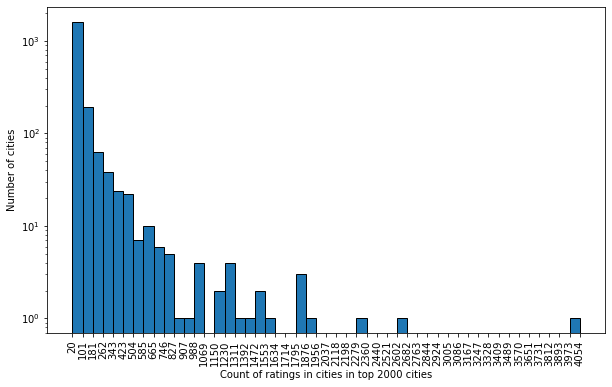

most_active_cities:                 count
city                
london          4054
barcelona       2645
toronto         2282
madrid          1912
sydney          1863
melbourne       1843
portland        1816
vancouver       1632
chicago         1537
seattle         1500
new york        1433
milano          1332
san diego       1300
berlin          1290
san francisco   1282
ottawa          1266
houston         1212
paris           1169
los angeles     1018
austin          1013
roma            1001
calgary          998
hamburg          987
victoria         853
manchester       818
lisboa           792
singapore        791
brisbane         786
christchurch     770
rome             736
perth            730
edmonton         728
st. louis        709
tucson           671
philadelphia     667
adelaide         660
montreal         648
albuquerque      632
dallas           626
richmond         624
minneapolis      621
brooklyn         620
atlanta          592
cambridge        591
auckland     

In [10]:
users_EDA_cities = users_EDA.groupby('city').size().to_frame('count').sort_values('count', ascending=False)
most_active_cities = users_EDA_cities[users_EDA_cities['count']>500]

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(users_EDA_cities['count'][:2000],log=True,edgecolor='black',bins=50)
plt.xlabel('Count of ratings in cities in top 2000 cities')
plt.xticks(bins, rotation=90)
plt.ylabel('Number of cities')
plt.show()

print('most_active_cities: ',most_active_cities)

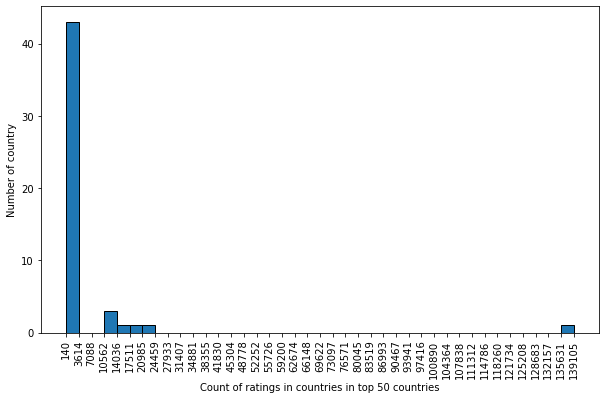

most_active_countries:                    count
country                
 usa             139105
 canada           21528
 united kingdom   18225
 germany          17002
 spain            13078
 australia        11702
 italy            11222
 france            3435
 portugal          3300
 new zealand       3056
 netherlands       2997
 switzerland       1732
 brazil            1667
 china             1455
 sweden            1398
 india             1262
 austria           1128
 malaysia          1084
 argentina         1074
 finland            917
 singapore          863
 belgium            814
 mexico             800
 denmark            797
 ireland            733
 philippines        696


In [11]:
users_EDA_countries = users_EDA.groupby('country').size().to_frame('count').sort_values('count', ascending=False)
most_active_countries = users_EDA_countries[users_EDA_countries['count']>500]

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(users_EDA_countries['count'][:50], bins = 40,edgecolor='black')
plt.xlabel('Count of ratings in countries in top 50 countries')
plt.xticks(bins, rotation=90)
plt.ylabel('Number of country')
plt.show()

print('most_active_countries: ',most_active_countries)

In [12]:
users_EDA_countries['count'].to_csv('EDA_users_EDA_countries.csv')

## Review EDA

__________  Books Statistic
Total count of rated books:  311845
Maximum count of ratings on a book:  2502
Minimum count of ratings on a book:  1
Median count of ratings on a book:  1.0
Count of books with higher than or equal to 10 ratings:  18077
Count of books with higher than or equal to 5 ratings:  41983
Count of books with higher than or equal to 2 ratings:  132801


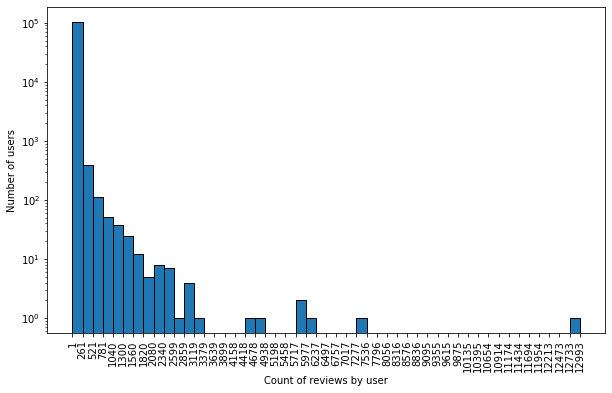

In [13]:
print('_'*10 , ' Books Statistic')
grouped_be_isbn_df= ratings[['isbn']].groupby('isbn')


print('Total count of rated books: ',grouped_be_isbn_df.size().shape[0])
print('Maximum count of ratings on a book: ', grouped_be_isbn_df.size().max())
print('Minimum count of ratings on a book: ', grouped_be_isbn_df.size().min())
print('Median count of ratings on a book: ',grouped_be_isbn_df.size().median())
print('Count of books with higher than or equal to 10 ratings: ',len(grouped_be_isbn_df.size()[grouped_be_isbn_df.size()>=10]))
print('Count of books with higher than or equal to 5 ratings: ',len(grouped_be_isbn_df.size()[grouped_be_isbn_df.size()>=5]))
print('Count of books with higher than or equal to 2 ratings: ',len(grouped_be_isbn_df.size()[grouped_be_isbn_df.size()>=2]))

user_rating_count =  ratings.groupby('user_id').size().to_frame('count').sort_values('count', ascending=False)
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(user_rating_count['count'], log=True,bins=50,edgecolor='black')
plt.xlabel('Count of reviews by user')

plt.xticks(bins, rotation=90)
plt.ylabel('Number of users')
plt.show()


__________  Reviewer Statistic
Total count of reviewers:  105283
Maximum count of reviews by a reviewer:  12993
Minimum count of reviews by a reviewer:  1
Median count of ratings on a book:  1.0
Count of reviewers with higher than or equal to 10 ratings:  13092
Count of reviewers with higher than or equal to 5 ratings:  22813
Count of reviewers with higher than or equal to 2 ratings:  46104


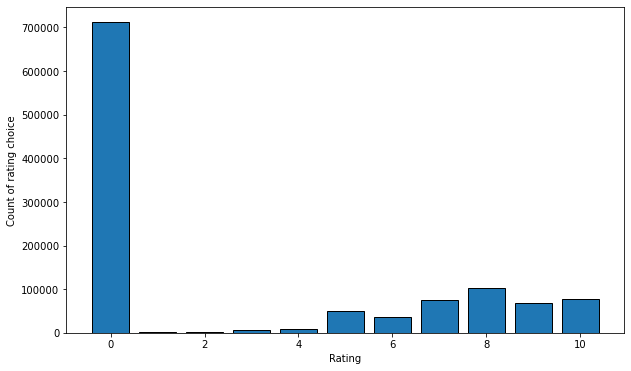

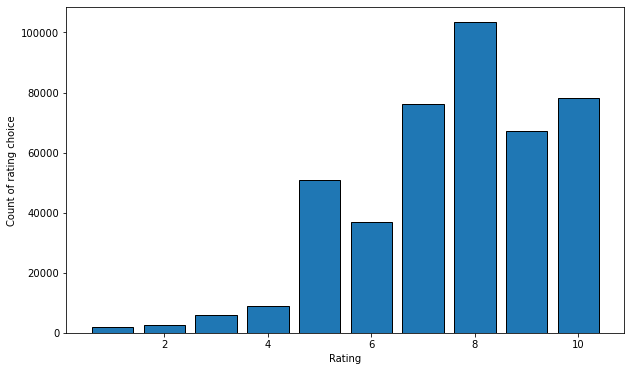

In [14]:
print('_'*10 , ' Reviewer Statistic')
grouped_by_user_id_df= ratings[['user_id']].groupby('user_id')


print('Total count of reviewers: ',grouped_by_user_id_df.size().shape[0])
print('Maximum count of reviews by a reviewer: ', grouped_by_user_id_df.size().max())
print('Minimum count of reviews by a reviewer: ', grouped_by_user_id_df.size().min())
print('Median count of ratings on a book: ',grouped_by_user_id_df.size().median())
print('Count of reviewers with higher than or equal to 10 ratings: ',len(grouped_by_user_id_df.size()[grouped_by_user_id_df.size()>=10]))
print('Count of reviewers with higher than or equal to 5 ratings: ',len(grouped_by_user_id_df.size()[grouped_by_user_id_df.size()>=5]))
print('Count of reviewers with higher than or equal to 2 ratings: ',len(grouped_by_user_id_df.size()[grouped_by_user_id_df.size()>=2]))


unique_rating_count = ratings.groupby('rating').size().to_frame('count').sort_values('count', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(unique_rating_count.index, unique_rating_count['count'], edgecolor='black')
plt.xlabel('Rating')

plt.ylabel('Count of rating choice')
plt.show()


unique_rating_count = unique_rating_count[unique_rating_count.index!=0]
plt.figure(figsize=(10, 6))
plt.bar(unique_rating_count.index, unique_rating_count['count'], edgecolor='black')
plt.xlabel('Rating')

plt.ylabel('Count of rating choice')
plt.show()

In [15]:
ratio_zero = ratings[ratings['rating']==0].shape[0]/ratings.shape[0]
print(f'Ratio of zero ratings: {ratio_zero}')
non_zero_median = ratings[ratings['rating']!=0]['rating'].median()
non_zero_mean = ratings[ratings['rating']!=0]['rating'].mean()
non_zero_std = ratings[ratings['rating']!=0]['rating'].std()

print(f'Median, mean and std of the non zero ratings: {non_zero_median, non_zero_mean, non_zero_std}')

Ratio of zero ratings: 0.6222674038632924
Median, mean and std of the non zero ratings: (8.0, 7.599959289509416, 1.8436094031020065)


In [16]:
zero_reviewer_id = ratings[ratings['rating'] == 0]['user_id']
zero_reviewer_unique_rating_count = ratings[ratings['user_id'].isin(zero_reviewer_id)].groupby(['user_id'])['rating'].nunique().to_frame('unique_count')
print(zero_reviewer_unique_rating_count.groupby('unique_count').size()[1])
not_useful_users = zero_reviewer_unique_rating_count[zero_reviewer_unique_rating_count['unique_count'] ==1].index
ratings = ratings[ratings['user_id'].isin(zero_reviewer_id)][~ratings['user_id'].isin(not_useful_users)]

27478


C:\Users\arind\AppData\Local\Temp\ipykernel_31256\1586773787.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ratings = ratings[ratings['user_id'].isin(zero_reviewer_id)][~ratings['user_id'].isin(not_useful_users)]


In [17]:
ratings = ratings[ratings['rating']!=0]

In [18]:
non_zero_median = ratings[ratings['rating']!=0]['rating'].median()
non_zero_mean = ratings[ratings['rating']!=0]['rating'].mean()
non_zero_std = ratings[ratings['rating']!=0]['rating'].std()

print(f'Median, mean and std of the non zero ratings: {non_zero_median, non_zero_mean, non_zero_std}')

Median, mean and std of the non zero ratings: (8.0, 7.616742649083622, 1.8369322031023203)


## Collaborative Filtering Based Recommender System

In [66]:
# Configs
user_rating_threshold = 3
book_rating_threshold = 3

# Fetch Name
ratings_with_name = ratings.merge(books,on='isbn')
ratings_with_name.head()
ratings_with_name = ratings_with_name[['isbn','user_id','rating', 'book_title']]


x = ratings_with_name.groupby('user_id').count()['rating'] > user_rating_threshold
above_threshold_users = x[x].index
filtered_rating = ratings_with_name[ratings_with_name['user_id'].isin(above_threshold_users)]

y = filtered_rating.groupby('isbn').count()['rating']>= book_rating_threshold
famous_books = y[y].index
final_ratings = filtered_rating[filtered_rating['isbn'].isin(famous_books)]

pt = final_ratings.pivot_table(index='isbn',columns='user_id',values='rating')
pt.fillna(0,inplace=True)

similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(21097, 21097)

In [139]:
print ('similarity_scores: ',similarity_scores[:5])
print ('Pivot Table: ',pt.head())

similarity_scores:  [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.20071182 ... 0.         0.         0.        ]
 [0.         0.20071182 1.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Pivot Table:  user_id     8       17      53      99      183     232     242     243     \
isbn                                                                         
0001046438     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0002005018     5.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0002116286     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0002190915     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0002239183     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

user_id     254     272     ...  278563  278582  2785

In [63]:
def recommend_isbn(book_name):
#     
    book_isbn = books[books['book_title'] == book_name]['isbn'].iloc[0]
    return_list = []
    index = np.where(pt.index==book_isbn)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:10]
    for item in similar_items:
        isbn = pt.index[item[0]]
#         print(books[books['isbn'] == isbn]['book_title'].iloc[0])
        return_list.append(books[books['isbn'] == isbn]['book_title'].iloc[0])

    
    return return_list

# def recommend_name(book_name):
# #     
# #     book_name = books[books['book_title'] == book_name]['isbn'].iloc[0]
#     return_list = []
#     index = np.where(pt.index==book_name)[0][0]
#     similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:10]
# #     for item in similar_items:
# #         isbn = pt.index[item[0]]
# # #         print(books[books['isbn'] == isbn]['book_title'].iloc[0])
# #         return_list.append(books[books['isbn'] == isbn]['book_title'].iloc[0])

    
#     return similar_items

In [147]:
recommend_isbn('1984')
# np.where(pt.index=='1984')[0][0]

['Animal Farm',
 'Brave New World',
 'The Box Garden',
 'The Enchantment of Lily Dahl: A Novel',
 'Ribsy',
 'We',
 'El Principito/Little Prince',
 'Are You in the House Alone? (Laurel-Leaf Mystery)',
 'The Elric Saga PT. II']

In [65]:
import pickle
# pickle.dump(popular_df,open('popular.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))
# pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

## Merged Approach

In [73]:
final_community_df = pd.read_csv('Community.csv').drop('Unnamed: 0', axis = 1)

{"'Salem's Lot",
 '1984',
 '1st to Die: A Novel',
 '84 Charing Cross Road',
 'A Brace of Bloodhounds (Bloodhound (Paperback))',
 'A Brief History of Time : The Updated and Expanded Tenth Anniversary Edition',
 'A Case of Need',
 'A Cold Heart: An Alex Delaware Novel',
 'A Cold-Blooded Business: A Kate Shugak Mystery',
 'A Darkness More Than Night',
 'A Day Late and a Dollar Short',
 "A Gathering of Days : A New England Girl's Journal, 1830-32",
 'A God in Ruins',
 'A Home at the End of the World: A Novel',
 'A Man Named Dave: A Story of Triumph and Forgiveness',
 'A Murderous Yarn (Needlecraft Mysteries)',
 'A Natural History of the Senses',
 'A Painted House',
 "A Patchwork Planet (Ballantine Reader's Circle)",
 'A Pirate Looks at Fifty',
 'A Place Called Freedom',
 'A Prayer for Owen Meany',
 "A Rose For Her Grave &amp; Other True Cases (Ann Rule's Crime Files)",
 "A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series)",
 'A Short Guide to a Happy Life',
 'A Th

In [109]:
def recommend_merged_isbn(book_name):
#     
    book_isbn = books[books['book_title'] == book_name]['isbn'].iloc[0]
    return_list = []
    index = np.where(pt.index==book_isbn)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:20]
    for item in similar_items:
        isbn = pt.index[item[0]]
#         print(books[books['isbn'] == isbn]['book_title'].iloc[0])
        return_list.append(books[books['isbn'] == isbn]['book_title'].iloc[0])
    community = int(final_community_df[final_community_df['book_title'] == book_name]['Community of Book'])
    return_list = set(final_community_df[final_community_df['Community of Book'] ==community]['book_title']).intersection(set(return_list))
    return (return_list)


In [149]:
recommend_merged_isbn("1984")

{'Animal Farm', 'Brave New World', 'The Memoirs of Hadrian'}